# Car Price predictor - Exploritory Data Analysis
this data comes from kaggle.com - https://www.kaggle.com/datasets/CooperUnion/cardataset

First step is to load tools/import libraries to help with loading the data set and exploratory analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'C:\Users\v-joecamp\OneDrive - Microsoft\Desktop\Jupyter Notebook\car prices.csv')


Need to understand the data. There ways to do this. 

In [2]:
# this is a snap shot of the data - looks at the first 5 rows of data and the columns of the data set. If you want to look
# additional rows then add a number in the parathesis.  
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
#infomation about data types. Notice that there are a total of 11,914 entries in the data set. There is some missing data
#for the following columns: Engine HP, Engine Cyclinders, Engine Fuel Type (small no# missing), Number of Doors, Market Category

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [4]:
#this gives some overall statistics above the data set specifically the columns represented are those where the data are 
#integers/numbers

print(df.describe().round(2))

           Year  Engine HP  Engine Cylinders  Number of Doors  highway MPG  \
count  11914.00   11845.00          11884.00         11908.00     11914.00   
mean    2010.38     249.39              5.63             3.44        26.64   
std        7.58     109.19              1.78             0.88         8.86   
min     1990.00      55.00              0.00             2.00        12.00   
25%     2007.00     170.00              4.00             2.00        22.00   
50%     2015.00     227.00              6.00             4.00        26.00   
75%     2016.00     300.00              6.00             4.00        30.00   
max     2017.00    1001.00             16.00             4.00       354.00   

       city mpg  Popularity        MSRP  
count  11914.00    11914.00    11914.00  
mean      19.73     1554.91    40594.74  
std        8.99     1441.86    60109.10  
min        7.00        2.00     2000.00  
25%       16.00      549.00    21000.00  
50%       18.00     1385.00    29995.00  
75%

In [5]:
#this gives information about the data set specifically the columns represented by object data types. 
df.describe(include=[object])

,Make,Model,Engine Fuel Type,Transmission Type,Driven_Wheels,Market Category,Vehicle Size,Vehicle Style
count,11914,11914,11911,11914,11914,8172,11914,11914
unique,48,915,10,5,4,71,3,16
top,Chevrolet,Silverado 1500,regular unleaded,AUTOMATIC,front wheel drive,Crossover,Compact,Sedan
freq,1123,156,7172,8266,4787,1110,4764,3048


In [6]:
#check for missing data
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [7]:
## Based on above (missing data) I am going to fill missing values for the following columns with the Median of the
## remaining - columns are Engine HP, Engine Cylinders, Number of doors. I am using Median as these two columns are numbers 
## (float64 as referenced above.)

df['Engine HP'].fillna(df['Engine HP'].median(), inplace=True)
df['Engine Cylinders'].fillna(df['Engine Cylinders'].median(), inplace=True)
df['Number of Doors'].fillna(df['Number of Doors'].median(), inplace=True)

In [8]:
## For the missing data in Engine Fuel Type I use the following code to fill missing object data. 
## The column Engine Fuel Type is object data. As mode is the object value that appears the most frequently in the column
## The mode function returns a series so [0] is used to access the first value in the series.


df['Engine Fuel Type'].fillna(df['Engine Fuel Type'].mode()[0], inplace=True)

In [9]:
## Confirming these four columns have been adjusted. 
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        0
Engine HP               0
Engine Cylinders        0
Transmission Type       0
Driven_Wheels           0
Number of Doors         0
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [10]:
#check for duplicate information

df.duplicated().sum()

715

In [11]:
#this gives a quick view of the duplicate rows. My thought was to remove the duplicate rows BUT I see, in the list, rows
# listed as duplicates, are not completely the same. Example - ID numbers 11603 and 11604 - the engine HP is 
#different for these vehicles and the MSRP is different. Based on this I am not going to remove any of the rows. 

duplicated_rows = df[df.duplicated()]

duplicated_rows

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
14,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,19,3916,31500
18,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
20,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
24,Audi,100,1993,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
25,Audi,100,1993,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11481,Suzuki,X-90,1998,regular unleaded,95.0,4.0,MANUAL,four wheel drive,2.0,NaN,Compact,2dr SUV,26,22,481,2000
11603,Volvo,XC60,2017,regular unleaded,302.0,4.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Luxury,Performance",Midsize,4dr SUV,29,20,870,46350
11604,Volvo,XC60,2017,regular unleaded,240.0,4.0,AUTOMATIC,front wheel drive,4.0,"Crossover,Luxury",Midsize,4dr SUV,30,23,870,40950
11708,Suzuki,XL7,2008,regular unleaded,252.0,6.0,AUTOMATIC,all wheel drive,4.0,Crossover,Midsize,4dr SUV,22,15,481,29149


In [12]:
# I want to understand the dispersion of car makers across the data set. This helps me understand the breakdown of vehicle 
# by brand

column_data = df["Make"]
value_counts = column_data.value_counts()
print(value_counts)

Make
Chevrolet        1123
Ford              881
Volkswagen        809
Toyota            746
Dodge             626
Nissan            558
GMC               515
Honda             449
Mazda             423
Cadillac          397
Mercedes-Benz     353
Suzuki            351
BMW               334
Infiniti          330
Audi              328
Hyundai           303
Volvo             281
Subaru            256
Acura             252
Kia               231
Mitsubishi        213
Lexus             202
Buick             196
Chrysler          187
Pontiac           186
Lincoln           164
Oldsmobile        150
Land Rover        143
Porsche           136
Saab              111
Aston Martin       93
Plymouth           82
Bentley            74
Ferrari            69
FIAT               62
Scion              60
Maserati           58
Lamborghini        52
Rolls-Royce        31
Lotus              29
Tesla              18
HUMMER             17
Maybach            16
Alfa Romeo          5
McLaren             5
Spyke

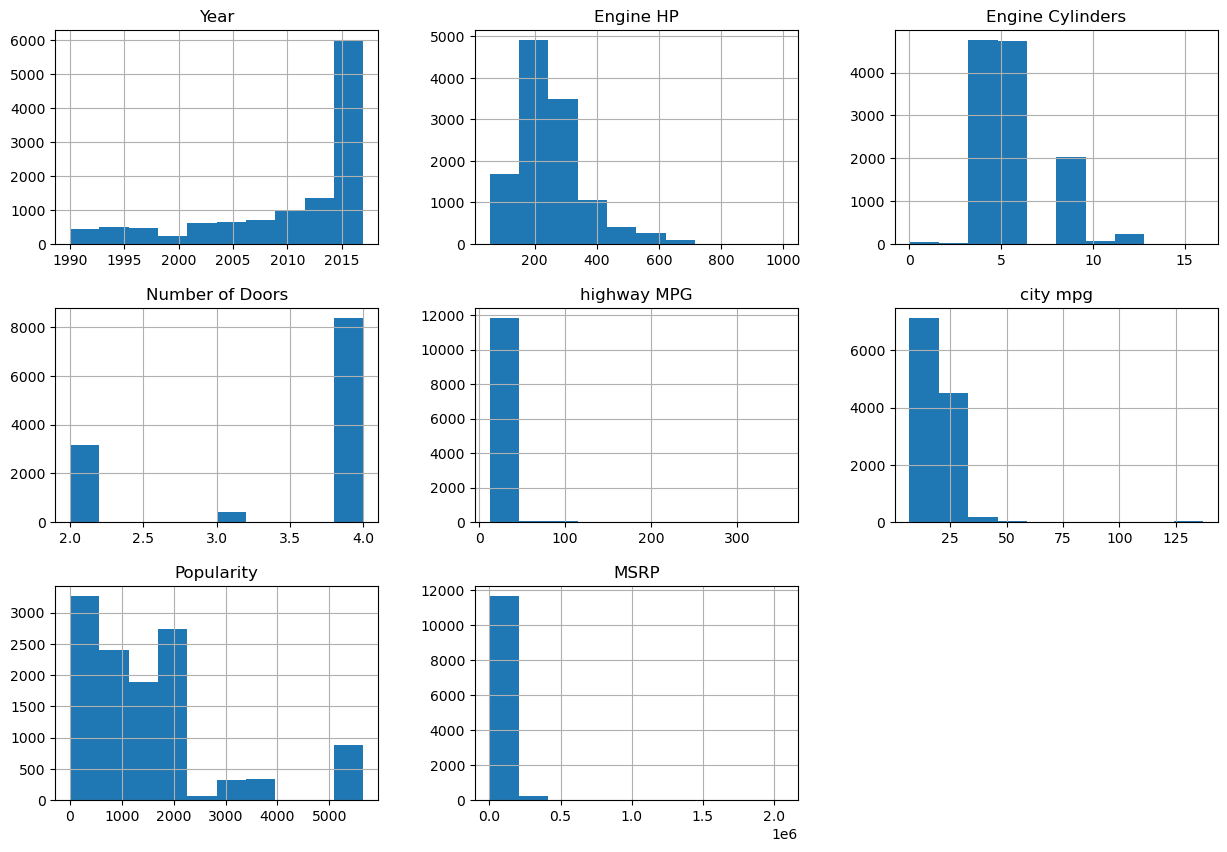

In [13]:
##Histograms of the columns with numerical values of the entire data set. this provide a high level view of the data set
## though some of the histograms don't make a ton of sense. 

df.hist(figsize=(15, 10))
plt.show()


The above histrograms provide some insight BUT also provide a bit of "what the heck" does this mean. So going to go a bit 
deeper into a few of these. I want to look at the following individually: highway MPG, city mpg, engine horsepower. I'm doing this just to get better understanding of the data set - specifically distribution of the data in these columns. 

Text(0, 0.5, 'Number of cars')

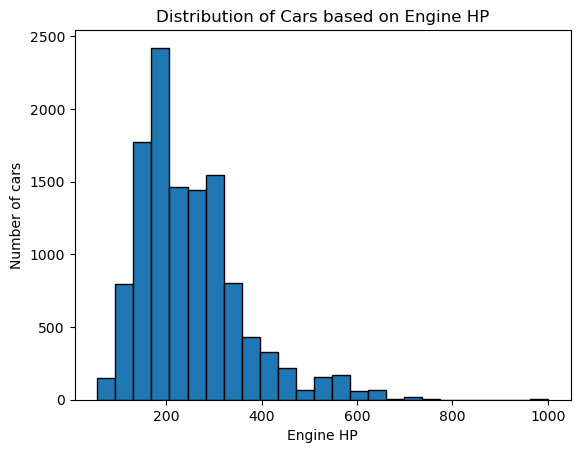

In [14]:
##This shows cars distribution based on engine hp. Odds are the those cars in the tail of this chart are "higher-end"/more
## expensive cars. These outliers will impact the model. We will consider removing these from the data set when we move to 
## building the linear regression model. 

df['Engine HP'].plot(kind='hist', bins=25, edgecolor='black')

plt.title('Distribution of Cars based on Engine HP')
plt.xlabel('Engine HP')
plt.ylabel('Number of cars')

Text(0, 0.5, 'Number of cars')

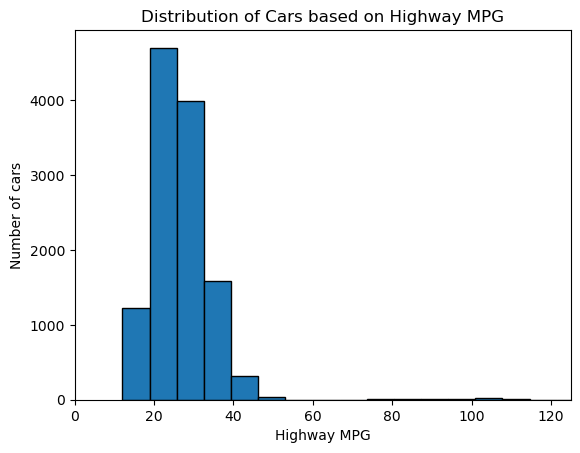

In [15]:
##This is interesting. First, this shows a large percentage of cars with highway MPG in the 20 to 30 miles per gallon range.
## Second, there are a few cars with Highway MPG over 60. 
## the code plt.xlim allows you to specify the range for the x axis. You can use the same for the y axis. 


df['highway MPG'].plot(kind='hist', bins=50, edgecolor='black')

plt.xlim(0,125)

plt.title('Distribution of Cars based on Highway MPG')
plt.xlabel('Highway MPG')
plt.ylabel('Number of cars')

In [16]:
##As I'm curious, I'd like to see the list of cars with Highway MPG above 60.

highMPG_df = df[df['highway MPG']>60]
highMPG_df.count()

Make                 67
Model                67
Year                 67
Engine Fuel Type     67
Engine HP            67
Engine Cylinders     67
Transmission Type    67
Driven_Wheels        67
Number of Doors      67
Market Category      62
Vehicle Size         67
Vehicle Style        67
highway MPG          67
city mpg             67
Popularity           67
MSRP                 67
dtype: int64

In [17]:
##This is a list of the unique values for the cars with highway MPG > 60. The 354 number is an outlier (and is shown
## below)

unique_values = highMPG_df['highway MPG'].unique()
print(unique_values)

[108 103 354  82 110 105  99 102 111 106 101  90  97  94  98 100 107  74
  92 109]


<Axes: xlabel='highway MPG', ylabel='MSRP'>

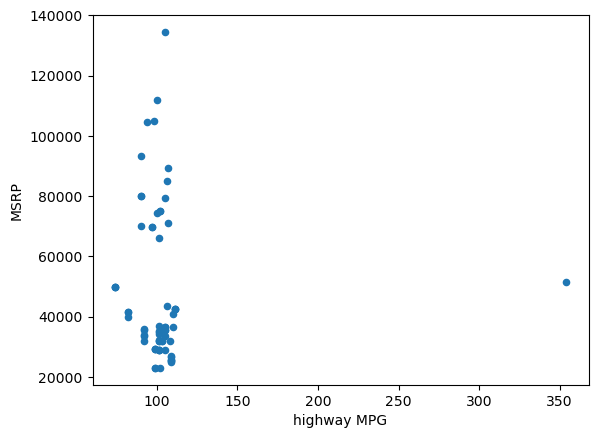

In [18]:
##I'm curious if there is any corellation between highway MPG (high miles) and MSRP. I built a scatter plot to visualize
##this. Looks like there are a few outliers with MSRP above 100,000. The concentration of vehicles with high highway MPG 
## are clustered in the 20,000 to 50,000 dollar range. 

highMPG_df.plot(kind='scatter', x='highway MPG', y='MSRP')

Text(0, 0.5, 'Number of cars')

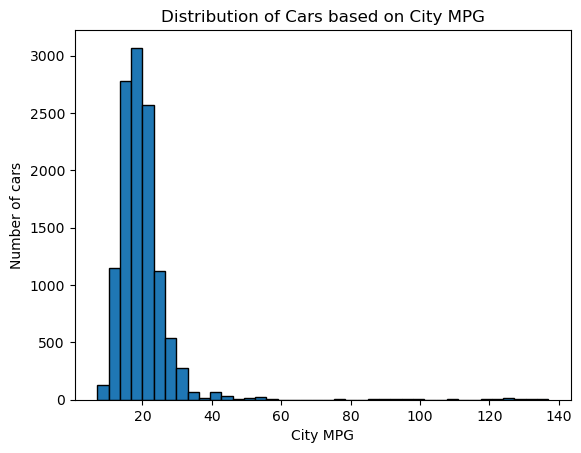

In [19]:
df['city mpg'].plot(kind='hist', bins=40, edgecolor='black')


plt.title('Distribution of Cars based on City MPG')
plt.xlabel('City MPG')
plt.ylabel('Number of cars')

In [20]:
##As I'm curious, I'd like to see the list/number of cars with city MPG above 60.

cityMPG_df = df[df['city mpg']>60]
cityMPG_df.count()

Make                 66
Model                66
Year                 66
Engine Fuel Type     66
Engine HP            66
Engine Cylinders     66
Transmission Type    66
Driven_Wheels        66
Number of Doors      66
Market Category      61
Vehicle Size         66
Vehicle Style        66
highway MPG          66
city mpg             66
Popularity           66
MSRP                 66
dtype: int64

In [21]:
## Similar to above the 354 number is an outlier. 

unique_values1 = cityMPG_df['city mpg'].unique()
print(unique_values)

[108 103 354  82 110 105  99 102 111 106 101  90  97  94  98 100 107  74
  92 109]


<Axes: xlabel='city mpg', ylabel='MSRP'>

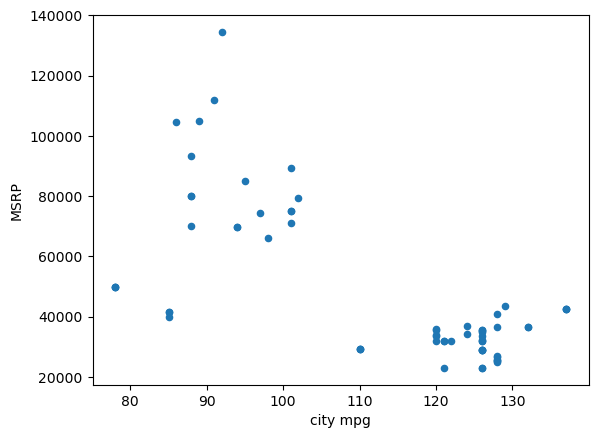

In [23]:
##I'm curious if there is any corellation between city MPG (high mileage) and MSRP. I built a scatter plot to visualize this. 
## Similar to above the majority of cars with high city MPG are clustered in the 20,00 to 55,000 dollar mark. 


cityMPG_df.plot(kind='scatter', x='city mpg', y='MSRP')

### nNet/net there may be some correlation between high MPG and MSRP. Will need to take this into consideration when building the linear regtression model. 

## Reviewing MSRP values within the data set

In [24]:
#get the count of each unique value in the 'MSRP' column. I want to see the distribution of MSRP/prices across the dataset
msrp_counts = df['MSRP'].value_counts()

#convert the series into a dataframe for better readability
msrp_counts_df = msrp_counts.reset_index()
msrp_counts_df.columns = ['MSRP', 'Count']

print(msrp_counts_df)

       MSRP  Count
0      2000   1036
1     29995     19
2     25995     19
3     20995     16
4     27995     16
...     ...    ...
6044  18855      1
6045  22575      1
6046  20050      1
6047  26965      1
6048  50920      1

[6049 rows x 2 columns]


In [25]:
#pulling the vehicle with the highest MSRP

max_msrp_index = df['MSRP'].idxmax()
row_with_max_msrp = df.loc[max_msrp_index]
print(row_with_max_msrp)

Make                                     Bugatti
Model                                Veyron 16.4
Year                                        2008
Engine Fuel Type     premium unleaded (required)
Engine HP                                 1001.0
Engine Cylinders                            16.0
Transmission Type               AUTOMATED_MANUAL
Driven_Wheels                    all wheel drive
Number of Doors                              2.0
Market Category          Exotic,High-Performance
Vehicle Size                             Compact
Vehicle Style                              Coupe
highway MPG                                   14
city mpg                                       8
Popularity                                   820
MSRP                                     2065902
Name: 11362, dtype: object


In [26]:
##puling the vehicle with the lowest MSRP

min_msrp_index = df['MSRP'].idxmin()
row_with_min_msrp = df.loc[min_msrp_index]
print(row_with_min_msrp)

Make                              Audi
Model                              100
Year                              1992
Engine Fuel Type      regular unleaded
Engine HP                        172.0
Engine Cylinders                   6.0
Transmission Type               MANUAL
Driven_Wheels        front wheel drive
Number of Doors                    4.0
Market Category                 Luxury
Vehicle Size                   Midsize
Vehicle Style                    Sedan
highway MPG                         24
city mpg                            17
Popularity                        3105
MSRP                              2000
Name: 17, dtype: object


In [27]:
#Considering the MSRP count from above I want to look a little deeper into the MSRP data. I am going to create buckets 
# starting 2000. Due to the size and breadth of the data set the buckets will be based on 50,000 intervals. 

#Define the bucket range
MSRP_range = range(2000, 2200000, 50000)

#create buckets 
msrp_buckets = pd.cut(df['MSRP'], bins=MSRP_range, include_lowest=True)
bucket_counts = msrp_buckets.value_counts().sort_index()

print(bucket_counts)

MSRP
(1999.999, 52000.0]       10089
(52000.0, 102000.0]        1200
(102000.0, 152000.0]        226
(152000.0, 202000.0]        133
(202000.0, 252000.0]        109
(252000.0, 302000.0]         63
(302000.0, 352000.0]         33
(352000.0, 402000.0]         15
(402000.0, 452000.0]         19
(452000.0, 502000.0]         16
(502000.0, 552000.0]          4
(552000.0, 602000.0]          0
(602000.0, 652000.0]          1
(652000.0, 702000.0]          0
(702000.0, 752000.0]          0
(752000.0, 802000.0]          0
(802000.0, 852000.0]          0
(852000.0, 902000.0]          0
(902000.0, 952000.0]          0
(952000.0, 1002000.0]         0
(1002000.0, 1052000.0]        0
(1052000.0, 1102000.0]        0
(1102000.0, 1152000.0]        0
(1152000.0, 1202000.0]        0
(1202000.0, 1252000.0]        0
(1252000.0, 1302000.0]        0
(1302000.0, 1352000.0]        0
(1352000.0, 1402000.0]        2
(1402000.0, 1452000.0]        0
(1452000.0, 1502000.0]        2
(1502000.0, 1552000.0]        0
(15

In [28]:
##Based on the buckets above I am going to create a new dataset with MSRP from 2000 thru 152000. That's approximately 11,515
## cars out of the original dataset of 11,914 or 96.6% of the original population. I will then run a correlation matrix on this bucket. 
##I will make another dataset of the remaining 15 percent and run a correlation matrix. My feeling is the two will show
##differences in what impacts price. 

#Define MSRP range
msrp_min = 2000
msrp_max = 152000

#create filtered dtaframe
filtered1_df = df[(df['MSRP']>= msrp_min) & (df['MSRP'] <= msrp_max)]
filtered1_df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


### Build a few Correlation matrices to understand relationships between variables

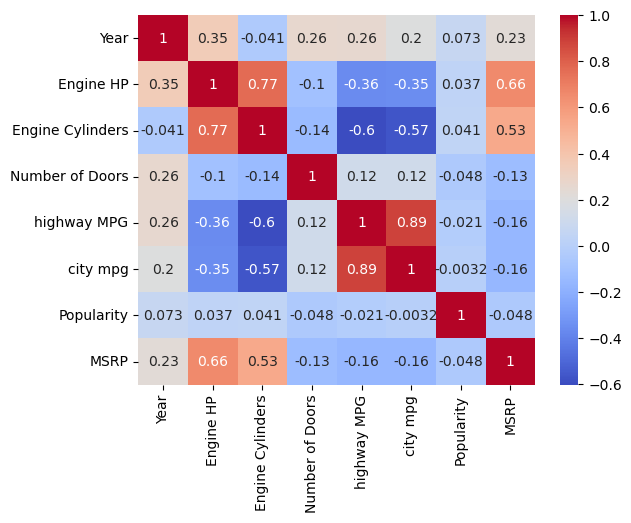

In [29]:
## Below builds a heatmap and correlation matrix to visualize what and how columns impact other columns. This will useful 
## when building out a linear regression model to help determine price or MSRP. Based on this map the three factors that
#impact/or are correlated to MSRP are year, engine hp, and engine cylinders. 

selected_columns = ['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG', 'city mpg', 'Popularity', 'MSRP']
df_selected=df[selected_columns]

correlation_matrix = df_selected.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

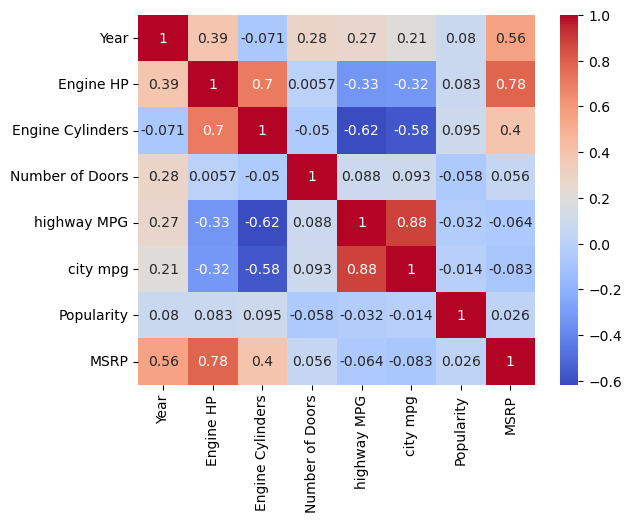

In [30]:
##Let's now build the same but using the filtered1_df data set which is a subset of the original data set. I want to see if 
## the correlation numbers from above change and, if so, by how much.

selected_columns = ['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG', 'city mpg', 'Popularity', 'MSRP']
filtered1_df_selected=filtered1_df[selected_columns]

correlation_matrix = filtered1_df_selected.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

### Comparing the two correlation matrices (above) the variables in the second correlation matrix , which used the filtered dataframe, have a stronger/more positive linear relationship between variables. Specifically the relationship of the variables Year, Engine HP, Number of Doors, and Popularity to the variable MSRP. The variable Engine Cylinders has a lower positive linear relationship with MSRP in the second matrix versus the first. 

### This tells me that filtering the original data set (pulling out the higher priced vehicles) should make for a more accurate linear regression model. 

Note - I realize my analysis hasn't taken into account the "object" data types. And I recognize that, odds are, some of these will impact the MSRP of a vehicle. I know I could have used Label Encoding or One Hot Encoding techniques that convert these catergorical variables into numerical variables but I wanted to just use the existing numerical variables for this project. 